# Start Here

December 16, 2024

This notebook demonstrates how to use the source code to analyze the Census data.

We explore the usage of three core classes:

- `Analyst`: handles analysis tasks including computation and stats
- `Respondent`: handles data storage for each individual census respondent
- `Plotter`: handles data visualization

In [1]:
import os

current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

print(f'Directory set to: {os.getcwd()}')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.plotter import Plotter
from src.respondent import Respondent
from src.analyst import Analyst

from IPython import get_ipython
# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')


Directory set to: /Users/aweng/code/battery-talent-census


# Start up the analysis

### Initialize the Analyst

In [3]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

# Access key class properties

In [4]:
print(len(analyst.respondents_list))

1008


The `respondents_list` holds a list of `Respondent` objects, each of which hold data for that particular response.

In [5]:
resp = analyst.respondents_list[0]
resp

Token:     fkqh2mecyeh4ille74ccdfkqh2d4hld5
Submitted: 2024-10-04 20:36:11
Duration:  18.72 minutes
Status:    Working

In [6]:
resp.census

{'sentiment': {'keys': ["I feel good about what I'm working on",
   'I feel good about my career path',
   'I feel good about my work-life balance',
   'I feel valued by those around me',
   'I see opportunities for career growth'],
  'values': array([4., 4., 4., 4., 4.])},
 'skills_demand': 'Scale up, the ability to keep up with and foresee research/industry trends and directions, language abilities (Chinese, Korean, Japanese) to learn from the bigger battery markets',
 'skills_value_chain': ['Equipment manufacturing',
  'Recycling',
  'Cell production'],
 'education': 'Doctorate',
 'degree': 'Chemistry',
 'country': 'United States',
 'zip': '77007 (just moved back to V4N 5H2)',
 'state': None,
 'income': np.float64(120000.0),
 'hours_worked': np.float64(40.0),
 'age': np.float64(35.0),
 'ethnicity': ['Asian'],
 'gender': 'Male',
 'citizenship': 'Non-citizen (TN visa)',
 'military_status': 'No',
 'employment_status': "I'm working professionally (e.g., at a company, national lab)",
 't

In [32]:
resp.company

{'company_satisfaction': {'keys': ['I am satisfied with my compensation',
   'I am being underpaid compared to similar roles',
   'I am satisfied with the raises and/or bonuses I have been receiving'],
  'values': array([3., 4., 2.])},
 'salary_base': np.float64(125000.0),
 'salary_comp_types': ['Equity (stock', 'options', 'etc.)'],
 'salary_num_raises': '1',
 'salary_num_bonuses': '0',
 'company_years_with': np.float64(3.0),
 'company_value_chain': ['Component/precursor production'],
 'company_stage': 'Startup (early growth)',
 'company_country': 'United States',
 'company_state': 'Texas',
 'company_days_in_office': np.float64(4.0),
 'company_headcount': '11-50',
 'company_team_count': '1-10',
 'role_title': 'Manager, R&D',
 'role_role': ['Managing people',
  'Managing projects or programs',
  'Research and development',
  'Supply chain',
  'Testing and validation',
  'Product design',
  'New product introduction (NPI)',
  'Strategy and planning'],
 'role_level': 'Manager',
 'role_why

In [7]:
resp.student

{'student_sentiment': {'keys': ['After graduating, I know what role(s) to apply to',
   'After graduating, I will find a job',
   'By the time I graduate, I will have learned the skills needed to find a job',
   'I am optimistic about the future of the battery industry'],
  'values': array([nan, nan, nan, nan])},
 'ideal_job_title': nan,
 'ideal_value_chain': [],
 'ideal_job_aspects': [],
 'ideal_salary': np.float64(nan),
 'num_internships': nan,
 'internship_value_chain': [],
 'internship_role': [],
 'internship_top_skills': nan,
 'internship_skills_wish_learned': nan,
 'internship_skills_unprepared': nan,
 'internship_hourly_pay': np.float64(nan),
 'internship_hours_per_week': np.float64(nan)}

In [8]:
resp.is_completed_all_questions

True

In [9]:
resp.is_student

False

In [10]:
resp.is_working

True

In [11]:
resp.is_unemployed

False

# Summarize stats for all respondents

In [20]:
res = analyst.summarize_stats()
res

{'num_total': 1008,
 'num_working': 797,
 'num_working_and_completed_all_questions': 605,
 'num_student': 84,
 'num_student_and_completed_all_questions': 79,
 'num_unemployed': 76,
 'num_unemployed_and_completed_all_questions': 60,
 'mins_working_median': np.float64(4.258333333333333),
 'mins_working_completed_median': np.float64(14.4),
 'mins_student_median': np.float64(5.6),
 'mins_student_completed_median': np.float64(7.75),
 'mins_unemployed_median': np.float64(3.7666666666666666),
 'mins_unemployed_completed_median': np.float64(14.45),
 'mins_working_list': [111.05,
  2.5,
  4.6,
  6.3,
  2.6166666666666667,
  2.5,
  5.183333333333334,
  2.9,
  3.8333333333333335,
  1.7666666666666666,
  9.65,
  4.516666666666667,
  2.9833333333333334,
  6.966666666666667,
  4.216666666666667,
  5.25,
  2.716666666666667,
  4.0,
  3.8833333333333333,
  19.533333333333335,
  8.883333333333333,
  4.733333333333333,
  3.033333333333333,
  4.166666666666667,
  5.216666666666667,
  2.6666666666666665,


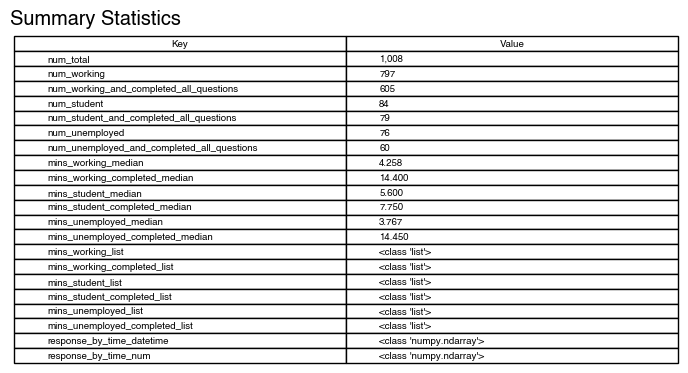

In [21]:
plotter = Plotter()
plotter.make_table_plot_from_dict(res,
                                  figsize=(7,4),
                                  title='Summary Statistics',
                                  saveas='table_summary_stats.png')

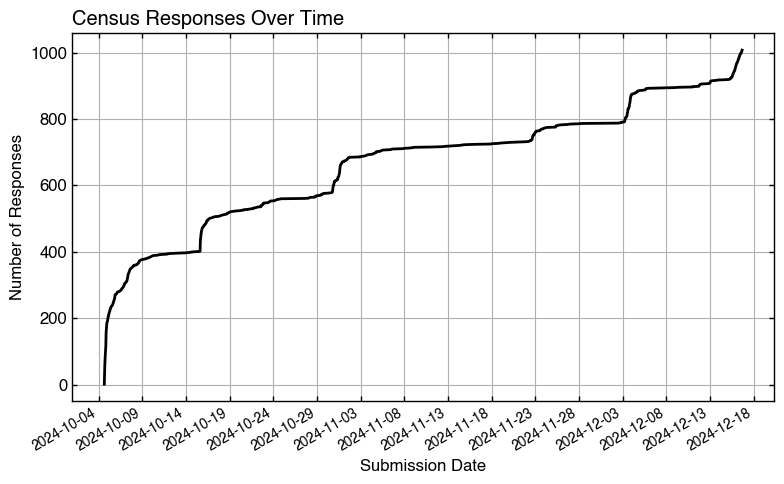

In [14]:
plotter = Plotter()

plotter.make_timeseries_plot(res['response_by_time_datetime'],
                             res['response_by_time_num'],
                             figsize=(8, 5),
                             title='Census Responses Over Time',
                             xlabel='Submission Date',
                             ylabel='Number of Responses',
                             saveas='census_responses_over_time.png')

In [22]:
res = analyst.summarize_census_backgrounds()
[print(x) for x in res.items()];

('degree', {'Chemistry': 137, 'Math': 5, 'Chemical Engineering': 135, 'Mechanical Engineering': 139, 'Materials Science and Engineering': 131, 'Engineering (Other)': 40, 'Finance and Accounting': 5, nan: 104, 'Computer and Information Systems': 5, 'Electrical Engineering': 81, 'Engineering Technology': 18, 'Management and Business Administration': 32, 'Nanotechnology Engineering': 16, 'Physics': 48, 'Biology': 2, 'Civil and Environmental Engineering': 12, 'Marketing': 6, 'Computer Science': 7, 'Mechatronics Engineering': 10, 'Engineering Science': 8, 'Liberal Arts': 2, 'Communications': 2, 'Economics': 16, 'Engineering Technician': 2, 'English': 1, 'Design': 5, 'Computer Engineering': 2, 'Environmental Science': 5, 'Anthropology and Sociology': 1, 'Political Science': 2, 'Aerospace Engineering': 2, 'Biomedical Engineering': 1, 'Other': 10, 'Architecture': 2, 'Criminal Justice': 2, 'Commercial Art and Graphic Design': 2, 'Education': 1, 'Legal Studies': 4, 'Psychology': 2, 'History': 1,

In [ ]:
plotter = Plotter()
plotter.make_bar_plot_from_dict(res['degree'],
                                title='Respondents by Major',
                                saveas='respondents_major.png',
                                exclusions=['nan'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res['country'],
                                title='Respondents by Country',
                                saveas='respondents_country.png',
                                exclusions=['nan'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res['state'],
                                title='Respondents by State (U.S. Only)',
                                saveas='respondents_state.png',
                                exclusions=['nan', 'None'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res['education'],
                                title='Respondents by Highest Degree',
                                saveas='respondents_degree.png',
                                num_elements=5,
                                exclusions=['nan'],
                                sorted=True)

# 'Latino' and 'or Spanish origin' are already covered under the category
# 'Hispanic'. This is an artefact of the string splitting which interpreted the
# commas within the string as different categories when they're not.
plotter.make_bar_plot_from_dict(res['ethnicity'],
                                title='Respondents by Ethnicity',
                                saveas='respondents_ethnicity.png',
                                exclusions=['nan', 'Latino', 'or Spanish origin'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res['gender'],
                                title='Respondents by Gender',
                                saveas='respondents_gender.png',
                                num_elements=4,
                                exclusions=['nan'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res['citizenship'],
                                title='Respondents by Citizenship Status',
                                saveas='respondents_citizenship.png',
                                num_elements=7,
                                exclusions=['nan'],
                                sorted=True)

plotter.make_bar_plot_from_dict(res['military_status'],
                                title='Respondents by Military Status',
                                saveas='respondents_military.png',
                                exclusions=['nan'],
                                sorted=True)

In [26]:
res = analyst.summarize_census_sentiment()
[print(x) for x in res.items()];

('keys', ["I feel good about what I'm working on", 'I feel good about my career path', 'I feel good about my work-life balance', 'I feel valued by those around me', 'I see opportunities for career growth'])
('values', array([[4., 4., 4., 4., 4.],
       [5., 4., 3., 3., 4.],
       [4., 4., 3., 4., 5.],
       ...,
       [4., 4., 4., 4., 4.],
       [4., 3., 4., 3., 3.],
       [5., 5., 4., 5., 5.]], shape=(1008, 5)))
('submit_time', array([Timestamp('2024-10-04 20:36:11'), Timestamp('2024-10-04 20:35:28'),
       Timestamp('2024-10-04 20:34:34'), ...,
       Timestamp('2024-12-16 15:40:44'), Timestamp('2024-12-16 16:02:03'),
       Timestamp('2024-12-16 16:05:31')], shape=(1008,), dtype=object))
('mean', array([4.07192807, 3.80880881, 3.56854839, 3.73467337, 3.75376884]))
('stdev', array([0.9756379 , 1.05432162, 1.08105884, 1.11000646, 1.13539375]))


('skills_in_demand', ['Scale up, the ability to keep up with and foresee research/industry trends and directions, language abilities (Chinese, Korean, Japanese) to learn from the bigger battery markets', 'Design for Reliability,   Test', 'Agile, Innovative, Communication', 'design, manufacturing, and testing', 'Electrochemistry, Process, Data Analysis', 'Scientific Observation, Data Analysis, ability to contribute to a team', 'Data analysis; research and experimentation; presentation skills', 'data science, manufacturing, pouch cells', 'Technical Knowledge; Software; Entrepreneurship', 'BMS, Safety, and process engineer', '[cell knowledge]', 'Electrical knowledge / organisational skills / poise', 'Manufacturing scale-up', 'Knowledge, Research, Analytical Power', 'MATLAB optimisation 1; COMSOL 2;', 'Skill 1 - Cell Engineering (R&D and Mature Products), Skill 2 - Product Pricing/Cost Engineering, Skill 3 - Strategic Partnership', nan, 'software/programming   battery chemistry design    t

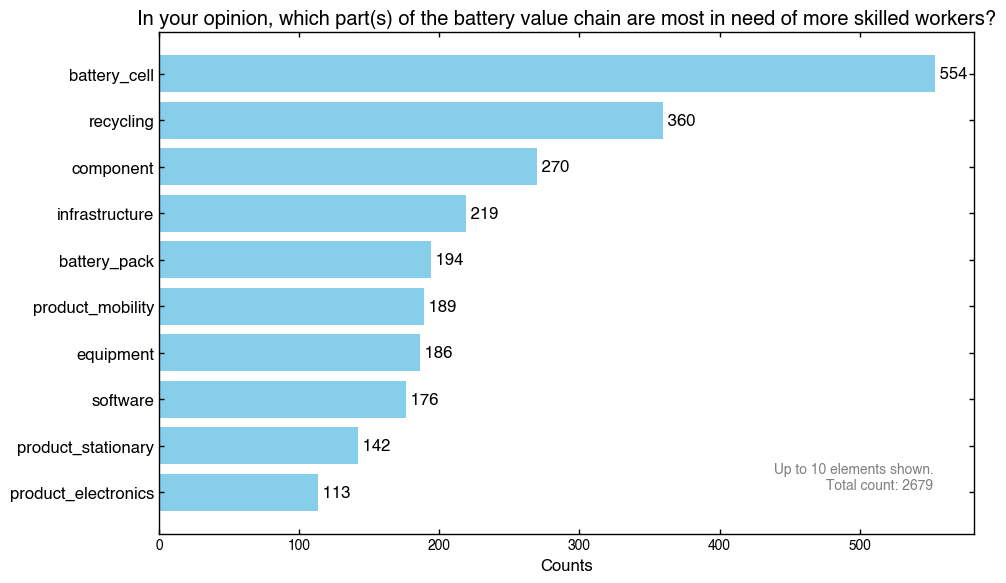

In [30]:
res = analyst.summarize_census_skills_demand()
[print(x) for x in res.items()];


plotter.make_bar_plot_from_dictionary(res['value_chain_in_demand'],
                                      title='In your opinion, which part(s) of the battery value chain are most in need of more skilled workers?',
                                      saveas='census_value_chain_in_demand.png',
                                      num_elements=10,
                                      exclusions=['nan'])

# Filter on subpopulations

In [20]:
filtered_list = analyst.filter_respondents_on(is_student=True,
                                              gender='Female')
print(len(filtered_list))

22


# Summarize stats for subpopulations

In [28]:
res = analyst.summarize_census_skills_demand(filtered_list)
[print(x) for x in res.items()];


('skills_in_demand', ['Data analysis, statistics, communication', 'troubleshooting, learning, communication', 'Materials knowledge; research experience; understanding of basic science', 'Coding; Electrochemistry knowledge', nan, '"Communication; collaboration;team work;AI")', 'Supply chain knowledge; Ability to work in a team; Coating knowledge', 'electrochemical testing; programming, data analysis', 'Controls(bms), material discovery (ml AI)', 'Machine learning, modeling, characterization testing', 'Most in demand is different from overlooked… underappreciated skills are data analytics; science communication; mentorship and community building', 'electrochemistry, manufacturing, data analyses', 'Process engineering, manufacturing-related, modelling', nan, 'BMS; Recycling; Data analysis', 'computational skills, battery modelling, data analysis', 'teamwork; communication; presentation', 'clear communication, cell-level design, BMS tuning', 'Critical thinking, creativity, science communic

# Study company information

Operate on the subset of data corresponding to working professionals who have completed the survey in its entirety.

In [31]:
res = analyst.summarize_company_satisfaction()
res

{'keys': ['I am satisfied with my compensation',
  'I am being underpaid compared to similar roles',
  'I am satisfied with the raises and/or bonuses I have been receiving'],
 'values': array([[3., 4., 2.],
        [4., 2., 3.],
        [3., 5., 2.],
        ...,
        [2., 3., 3.],
        [4., 2., 4.],
        [4., 1., 4.]], shape=(665, 3)),
 'submit_time': array([Timestamp('2024-10-04 20:36:11'), Timestamp('2024-10-04 20:35:28'),
        Timestamp('2024-10-04 20:34:34'), Timestamp('2024-10-04 20:34:32'),
        Timestamp('2024-10-04 20:31:17'), Timestamp('2024-10-04 20:28:57'),
        Timestamp('2024-10-04 20:23:39'), Timestamp('2024-10-04 20:22:55'),
        Timestamp('2024-10-04 20:22:39'), Timestamp('2024-10-04 20:16:00'),
        Timestamp('2024-10-04 20:15:36'), Timestamp('2024-10-04 20:14:41'),
        Timestamp('2024-10-04 20:12:39'), Timestamp('2024-10-04 20:09:39'),
        Timestamp('2024-10-04 20:08:20'), Timestamp('2024-10-04 20:02:18'),
        Timestamp('2024-10-04